# Spain Electricity Shortfall Regression Predict

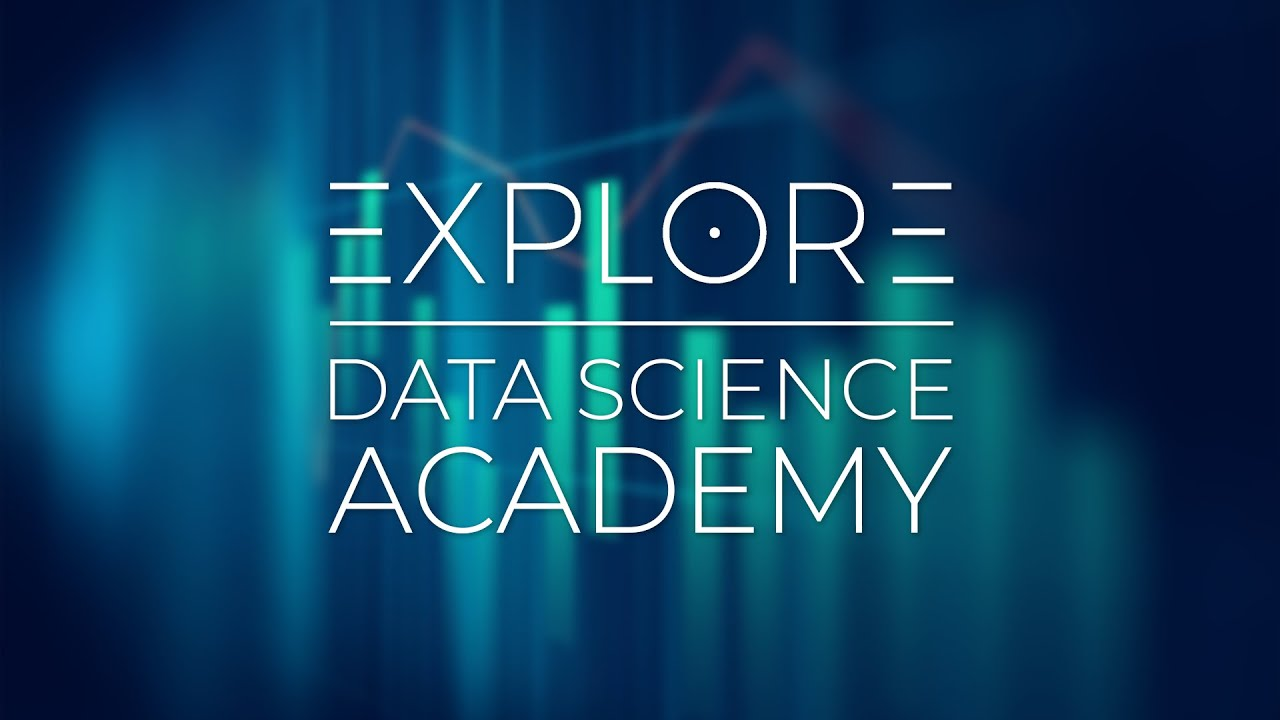

## Team FM6

## Introduction

 Electricity is not only plays a big part in our daily lives at home, but it is extremely important for all the things that go on in the world around us in our modern life, such as industry that we depend on, communication as in form of radio, television, e-mail, the Internet, etc. Now we take a step back to see where is that electricity generated from. One of the major findings was that burning fossils and renewable energy plays a vital role in generating electricity but burning fossils have some negative impact on the environment. Accurate forecast of electricty load demand inform investment decisions about power generation and supporting network infrastructure. Inaccurate forecasts, whether they over or under predict the demand, can have dire social and economic consequences. Underestimating demand results in supply shortage and forced power outages, with serious consequences for productivity and economic growth. Overestimating demand can lead to over investment in generation capacity, possible finacial distress, and ultimately, higher electricity prices. By providing a clear overview, it allow the parttern and interrelationships of economic growth ( and other relevant drivers) to come into focus.

## Problem Statement

The government of Spain is considering an expansion of it's renewable energy resource infrastructure investments. As such, they require information on the trends and patterns of the countries renewable sources and fossil fuel energy generation.

## Objectives Of The Project
The major objectives of the project are as follows:

- analyse the supplied data;
- identify potential errors in the data and clean the existing data set;
- determine if additional features can be added to enrich the data set;
- build a model that is capable of forecasting the three hourly demand shortfalls;
- evaluate the accuracy of the best machine learning model;
- determine what features were most important in the model’s prediction decision, and
- explain the inner working of the model to a non-technical audience.

<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

<a id="one"></a>
## 1. Importing Packages

In [1]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline
import seaborn as sns
# Libraries for data preparation and model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.tree import DecisionTreeRegressor
#from xgboost.sklearn import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import mean_squared_error as MSE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import math
from sklearn.model_selection import cross_val_score
from statsmodels.graphics.correlation import plot_corr
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from sklearn.linear_model import Lasso
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

<a id="two"></a>
## 2. Loading the Data

In [2]:
# Loading train and test data from csv files
df_train = pd.read_csv("df_train.csv")
df_test = pd.read_csv("df_test.csv")

In [3]:
df_train.head(3).T

0                    1  \
Unnamed: 0                              0                    1   
time                  2015-01-01 03:00:00  2015-01-01 06:00:00   
Madrid_wind_speed                0.666667             0.333333   
Valencia_wind_deg                 level_5             level_10   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed              0.666667             1.666667   
Seville_humidity                74.333333            78.333333   
Madrid_humidity                      64.0            64.666667   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                223.333333                221.0   
Barcelona_wind_speed             6.333333                  4.0   
Barcelona_wind_deg              42.666667                139.0   
Madrid_clouds_all                     0.0                  0.0   
Seville_wind_speed               3.333333             3.333333   
Barcelona_rain_1h                     0.0                  0.0   
Seville_pressure                     sp25                 sp25   
Seville_rain_1h                       0.0                  0.0   
Bilbao_snow_3h                        0.0                  0.0   
Barcelona_pressure            1036.333333          1037.333333   
Seville_rain_3h                       0.0                  0.0   
Madrid_rain_1h                        0.0                  0.0   
Barcelona_rain_3h                     0.0                  0.0   
Valencia_snow_3h                      0.0                  0.0   
Madrid_weather_id                   800.0                800.0   
Barcelona_weather_id                800.0                800.0   
Bilbao_pressure                    1035.0          1035.666667   
Seville_weather_id                  800.0                800.0   
Valencia_pressure             1002.666667          1004.333333   
Seville_temp_max               274.254667              274.945   
Madrid_pressure                971.333333           972.666667   
Valencia_temp_max                 269.888           271.728333   
Valencia_temp                     269.888           271.728333   
Bilbao_weather_id                   800.0                800.0   
Seville_temp                   274.254667              274.945   
Valencia_humidity               75.666667                 71.0   
Valencia_temp_min                 269.888           271.728333   
Barcelona_temp_max                281.013           280.561667   
Madrid_temp_max                   265.938           266.386667   
Barcelona_temp                    281.013           280.561667   
Bilbao_temp_min                269.338615              270.376   
Bilbao_temp                    269.338615              270.376   
Barcelona_temp_min                281.013           280.561667   
Bilbao_temp_max                269.338615              270.376   
Seville_temp_min               274.254667              274.945   
Madrid_temp                       265.938           266.386667   
Madrid_temp_min                   265.938           266.386667   
load_shortfall_3h             6715.666667          4171.666667   

                                        2  
Unnamed: 0                              2  
time                  2015-01-01 09:00:00  
Madrid_wind_speed                     1.0  
Valencia_wind_deg                 level_9  
Bilbao_rain_1h                        0.0  
Valencia_wind_speed                   1.0  
Seville_humidity                71.333333  
Madrid_humidity                 64.333333  
Bilbao_clouds_all                     0.0  
Bilbao_wind_speed                     1.0  
Seville_clouds_all                    0.0  
Bilbao_wind_deg                214.333333  
Barcelona_wind_speed                  2.0  
Barcelona_wind_deg                  326.0  
Madrid_clouds_all                     0.0  
Seville_wind_speed               2.

In [4]:
df_test.head(3).T

0                    1  \
Unnamed: 0                           8763                 8764   
time                  2018-01-01 00:00:00  2018-01-01 03:00:00   
Madrid_wind_speed                     5.0             4.666667   
Valencia_wind_deg                 level_8              level_8   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed                   5.0             5.333333   
Seville_humidity                     87.0                 89.0   
Madrid_humidity                 71.333333                 78.0   
Bilbao_clouds_all                    20.0                  0.0   
Bilbao_wind_speed                     3.0             3.666667   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                193.333333           143.333333   
Barcelona_wind_speed                  4.0             4.666667   
Barcelona_wind_deg             176.666667           266.666667   
Madrid_clouds_all                     0.0                  0.0   
Seville_wind_speed                    1.0             0.666667   
Barcelona_rain_1h                     0.0                  0.0   
Seville_pressure                     sp25                 sp25   
Seville_rain_1h                       0.0                  0.0   
Bilbao_snow_3h                          0                    0   
Barcelona_pressure            1017.333333          1020.333333   
Seville_rain_3h                       0.0                  0.0   
Madrid_rain_1h                        0.0                  0.0   
Barcelona_rain_3h                     0.0                  0.0   
Valencia_snow_3h                        0                    0   
Madrid_weather_id                   800.0                800.0   
Barcelona_weather_id                800.0           800.333333   
Bilbao_pressure               1025.666667          1026.666667   
Seville_weather_id                  800.0                800.0   
Valencia_pressure                     NaN                  NaN   
Seville_temp_max               284.483333           282.483333   
Madrid_pressure                    1030.0          1030.333333   
Valencia_temp_max              287.483333               284.15   
Valencia_temp                  287.483333               284.15   
Bilbao_weather_id                   801.0                721.0   
Seville_temp                   283.673333           281.673333   
Valencia_humidity               46.333333            53.666667   
Valencia_temp_min              287.483333               284.15   
Barcelona_temp_max             287.816667           284.816667   
Madrid_temp_max                280.816667           280.483333   
Barcelona_temp                 287.356667               284.19   
Bilbao_temp_min                    276.15           277.816667   
Bilbao_temp                        280.38               281.01   
Barcelona_temp_min             286.816667           283.483333   
Bilbao_temp_max                    285.15               284.15   
Seville_temp_min                   283.15               281.15   
Madrid_temp                    279.866667           279.193333   
Madrid_temp_min                    279.15               278.15   

                                        2  
Unnamed: 0                           8765  
time                  2018-01-01 06:00:00  
Madrid_wind_speed                2.333333  
Valencia_wind_deg                 level_7  
Bilbao_rain_1h                        0.0  
Valencia_wind_speed                   5.0  
Seville_humidity                     89.0  
Madrid_humidity                 89.666667  
Bilbao_clouds_all                     0.0  
Bilbao_wind_speed                2.333333  
Seville_clouds_all               6.666667  
Bilbao_wind_deg                     130.0  
Barcelona_wind_speed                  4.0  
Barcelona_wind_deg             263.333333  
Madrid_clouds_all                     0.0  
Seville_wind_speed               0.666667  
Barcelona_rain_1h                     0.0  
Seville_press

To make our life easier we will merge the two data set into one dataset containing our target variable ('load_shortfall_3h')

In [5]:
# merging df_train and df_test
df_concat = pd.concat([df_train, df_test])
df_concat.head(3).T

0                    1  \
Unnamed: 0                              0                    1   
time                  2015-01-01 03:00:00  2015-01-01 06:00:00   
Madrid_wind_speed                0.666667             0.333333   
Valencia_wind_deg                 level_5             level_10   
Bilbao_rain_1h                        0.0                  0.0   
Valencia_wind_speed              0.666667             1.666667   
Seville_humidity                74.333333            78.333333   
Madrid_humidity                      64.0            64.666667   
Bilbao_clouds_all                     0.0                  0.0   
Bilbao_wind_speed                     1.0                  1.0   
Seville_clouds_all                    0.0                  0.0   
Bilbao_wind_deg                223.333333                221.0   
Barcelona_wind_speed             6.333333                  4.0   
Barcelona_wind_deg              42.666667                139.0   
Madrid_clouds_all                     0.0                  0.0   
Seville_wind_speed               3.333333             3.333333   
Barcelona_rain_1h                     0.0                  0.0   
Seville_pressure                     sp25                 sp25   
Seville_rain_1h                       0.0                  0.0   
Bilbao_snow_3h                        0.0                  0.0   
Barcelona_pressure            1036.333333          1037.333333   
Seville_rain_3h                       0.0                  0.0   
Madrid_rain_1h                        0.0                  0.0   
Barcelona_rain_3h                     0.0                  0.0   
Valencia_snow_3h                      0.0                  0.0   
Madrid_weather_id                   800.0                800.0   
Barcelona_weather_id                800.0                800.0   
Bilbao_pressure                    1035.0          1035.666667   
Seville_weather_id                  800.0                800.0   
Valencia_pressure             1002.666667          1004.333333   
Seville_temp_max               274.254667              274.945   
Madrid_pressure                971.333333           972.666667   
Valencia_temp_max                 269.888           271.728333   
Valencia_temp                     269.888           271.728333   
Bilbao_weather_id                   800.0                800.0   
Seville_temp                   274.254667              274.945   
Valencia_humidity               75.666667                 71.0   
Valencia_temp_min                 269.888           271.728333   
Barcelona_temp_max                281.013           280.561667   
Madrid_temp_max                   265.938           266.386667   
Barcelona_temp                    281.013           280.561667   
Bilbao_temp_min                269.338615              270.376   
Bilbao_temp                    269.338615              270.376   
Barcelona_temp_min                281.013           280.561667   
Bilbao_temp_max                269.338615              270.376   
Seville_temp_min               274.254667              274.945   
Madrid_temp                       265.938           266.386667   
Madrid_temp_min                   265.938           266.386667   
load_shortfall_3h             6715.666667          4171.666667   

                                        2  
Unnamed: 0                              2  
time                  2015-01-01 09:00:00  
Madrid_wind_speed                     1.0  
Valencia_wind_deg                 level_9  
Bilbao_rain_1h                        0.0  
Valencia_wind_speed                   1.0  
Seville_humidity                71.333333  
Madrid_humidity                 64.333333  
Bilbao_clouds_all                     0.0  
Bilbao_wind_speed                     1.0  
Seville_clouds_all                    0.0  
Bilbao_wind_deg                214.333333  
Barcelona_wind_speed                  2.0  
Barcelona_wind_deg                  326.0  
Madrid_clouds_all                     0.0  
Seville_wind_speed               2.

We now have one data set that we will work on to carry out our project.

## Data size and Structure

In [6]:
# Checking the shape of the data set
df_concat.shape

(11683, 49)

This new data set contain 11683 rows and 49 column including our target variable.

In [7]:
# Display data type
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11683 entries, 0 to 2919
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11683 non-null  int64  
 1   time                  11683 non-null  object 
 2   Madrid_wind_speed     11683 non-null  float64
 3   Valencia_wind_deg     11683 non-null  object 
 4   Bilbao_rain_1h        11683 non-null  float64
 5   Valencia_wind_speed   11683 non-null  float64
 6   Seville_humidity      11683 non-null  float64
 7   Madrid_humidity       11683 non-null  float64
 8   Bilbao_clouds_all     11683 non-null  float64
 9   Bilbao_wind_speed     11683 non-null  float64
 10  Seville_clouds_all    11683 non-null  float64
 11  Bilbao_wind_deg       11683 non-null  float64
 12  Barcelona_wind_speed  11683 non-null  float64
 13  Barcelona_wind_deg    11683 non-null  float64
 14  Madrid_clouds_all     11683 non-null  float64
 15  Seville_wind_speed  

In [8]:
#make a copy of the df so that if we make mistakes we can always refer to the original df
df_new = df_concat.copy()

## Dealing With Missing Values

In [9]:
# Check for the sum and percentage of null values in each column
total_NaN = df_new.isnull().sum()
percent_NaN = round(df_new.isnull().sum()*100/len(df_new),2)
df_NaNs = pd.concat([total_NaN, percent_NaN], axis=1, keys=['Total NaN', 'Percent NaN'])
df_NaNs

Total NaN  Percent NaN
Unnamed: 0                    0         0.00
time                          0         0.00
Madrid_wind_speed             0         0.00
Valencia_wind_deg             0         0.00
Bilbao_rain_1h                0         0.00
Valencia_wind_speed           0         0.00
Seville_humidity              0         0.00
Madrid_humidity               0         0.00
Bilbao_clouds_all             0         0.00
Bilbao_wind_speed             0         0.00
Seville_clouds_all            0         0.00
Bilbao_wind_deg               0         0.00
Barcelona_wind_speed          0         0.00
Barcelona_wind_deg            0         0.00
Madrid_clouds_all             0         0.00
Seville_wind_speed            0         0.00
Barcelona_rain_1h             0         0.00
Seville_pressure              0         0.00
Seville_rain_1h               0         0.00
Bilbao_snow_3h                0         0.00
Barcelona_pressure            0         0.00
Seville_rain_3h               0         0.00
Madrid_rain_1h                0         0.00
Barcelona_rain_3h             0         0.00
Valencia_snow_3h              0         0.00
Madrid_weather_id             0         0.00
Barcelona_weather_id          0         0.00
Bilbao_pressure               0         0.00
Seville_weather_id            0         0.00
Valencia_pressure          2522        21.59
Seville_temp_max              0         0.00
Madrid_pressure               0         0.00
Valencia_temp_max             0         0.00
Valencia_temp                 0         0.00
Bilbao_weather_id             0         0.00
Seville_temp                  0         0.00
Valencia_humidity             0         0.00
Valencia_temp_min             0         0.00
Barcelona_temp_max            0         0.00
Madrid_temp_max               0         0.00
Barcelona_temp                0         0.00
Bilbao_temp_min               0         0.00
Bilbao_temp                   0         0.00
Barcelona_temp_min            0         0.00
Bilbao_temp_max               0         0.00
Seville_temp_min              0         0.00
Madrid_temp                   0         0.00
Madrid_temp_min               0         0.00
load_shortfall_3h          2920        24.99

* Valencia_pressure has approximately 22% of missing data.
* load_shortfall_3h	 has approximately 25% of missing data but this is nothing but our target forecast.

In [10]:
# Replacing Valencia_pressure null values with the mean

df_new['Valencia_pressure'] = df_new['Valencia_pressure'].fillna(df_new['Valencia_pressure'].mean())

In [11]:
## Droping Unneccessary Column
# Drop Unnamed: 0
df_new = df_new.drop(['Unnamed: 0'], axis = 1)

We drop this column because is the same as index.

<a id="four"></a>
## 3. Exploratory Data Analysis (EDA)

EDA is an approach of analyzing data set to summarize their main characteristics, often using statistical graphics and other data visualization methods (non-graphical).

In [12]:
# look at data statistics
df_new.describe().T

count          mean           std          min  \
Madrid_wind_speed     11683.0      2.433750      1.831762     0.000000   
Bilbao_rain_1h        11683.0      0.118698      0.334918     0.000000   
Valencia_wind_speed   11683.0      2.692873      2.321759     0.000000   
Seville_humidity      11683.0     63.774687     22.219380     8.333333   
Madrid_humidity       11683.0     58.721818     24.390621     6.333333   
Bilbao_clouds_all     11683.0     43.440712     32.046215     0.000000   
Bilbao_wind_speed     11683.0      1.958629      1.696043     0.000000   
Seville_clouds_all    11683.0     14.155268     24.541321     0.000000   
Bilbao_wind_deg       11683.0    159.878855    101.005654     0.000000   
Barcelona_wind_speed  11683.0      2.782419      1.758587     0.000000   
Barcelona_wind_deg    11683.0    187.654241     88.694717     0.000000   
Madrid_clouds_all     11683.0     20.668692     28.478087     0.000000   
Seville_wind_speed    11683.0      2.483067      1.705508     0.000000   
Barcelona_rain_1h     11683.0      0.108534      0.556794     0.000000   
Seville_rain_1h       11683.0      0.041120      0.180425     0.000000   
Bilbao_snow_3h        11683.0      0.023936      0.482817     0.000000   
Barcelona_pressure    11683.0   1287.326015  12189.057338   670.666667   
Seville_rain_3h       11683.0      0.000182      0.003171     0.000000   
Madrid_rain_1h        11683.0      0.043328      0.163996     0.000000   
Barcelona_rain_3h     11683.0      0.000331      0.003466     0.000000   
Valencia_snow_3h      11683.0      0.000154      0.010277     0.000000   
Madrid_weather_id     11683.0    769.851665     81.914258   211.000000   
Barcelona_weather_id  11683.0    764.603446     90.736191   200.666667   
Bilbao_pressure       11683.0   1017.482011      9.753552   971.333333   
Seville_weather_id    11683.0    774.050843     72.909418   200.000000   
Valencia_pressure     11683.0   1012.346687      7.807883   972.666667   
Seville_temp_max      11683.0    296.007363      8.929160   272.063000   
Madrid_pressure       11683.0   1011.797412     19.983122   927.666667   
Valencia_temp_max     11683.0    291.362722      7.441278   269.888000   
Valencia_temp         11683.0    290.788513      7.157835   269.888000   
Bilbao_weather_id     11683.0    727.800750    113.616789   207.333333   
Seville_temp          11683.0    293.170948      7.998774   272.063000   
Valencia_humidity     11683.0     65.091814     19.040927    10.333333   
Valencia_temp_min     11683.0    290.229939      7.003619   269.888000   
Barcelona_temp_max    11683.0    291.042128      7.236360   272.150000   
Madrid_temp_max       11683.0    289.377372      9.594562   264.983333   
Barcelona_temp        11683.0    289.869413      6.680538   270.816667   
Bilbao_temp_min       11683.0    284.993657      6.730076   264.483333   
Bilbao_temp           11683.0    286.447784      6.738466   267.483333   
Barcelona_temp_min    11683.0    288.616766      6.391989   269.483333   
Bilbao_temp_max       11683.0    288.095397      6.898601   269.063000   
Seville_temp_min      11683.0    291.263219      8.136234   270.150000   
Madrid_temp           11683.0    288.282055      9.258559   264.983333   
Madrid_temp_min       11683.0    287.056222      9.093455   264.983333   
load_shortfall_3h      8763.0  10673.857612   5218.046404 -6618.000000   

                              25%           50%           75%           max  
Madrid_wind_speed        1.000000      2.000000      3.333333  1.333333e+01  
Bilbao_rain_1h           0.000000      0.000000      0.100000  3.000000e+00  
Valencia_wind_speed      1.000000      2.000000      3.666667  5.200000e+01  
Seville_humidity        46.333333     67.000000     83.000000  1.000000e+02  
Madrid_humidity         38.000000     59.333333     80.000000  1.000000e+02  
Bilbao_clouds_all       12.000000     45.000000     75.000000  1.000000e+02  
Bilbao_wind_speed        1.000000      1.333333      2.666667  1.266667e+

<Axes: xlabel='Bilbao_temp'>

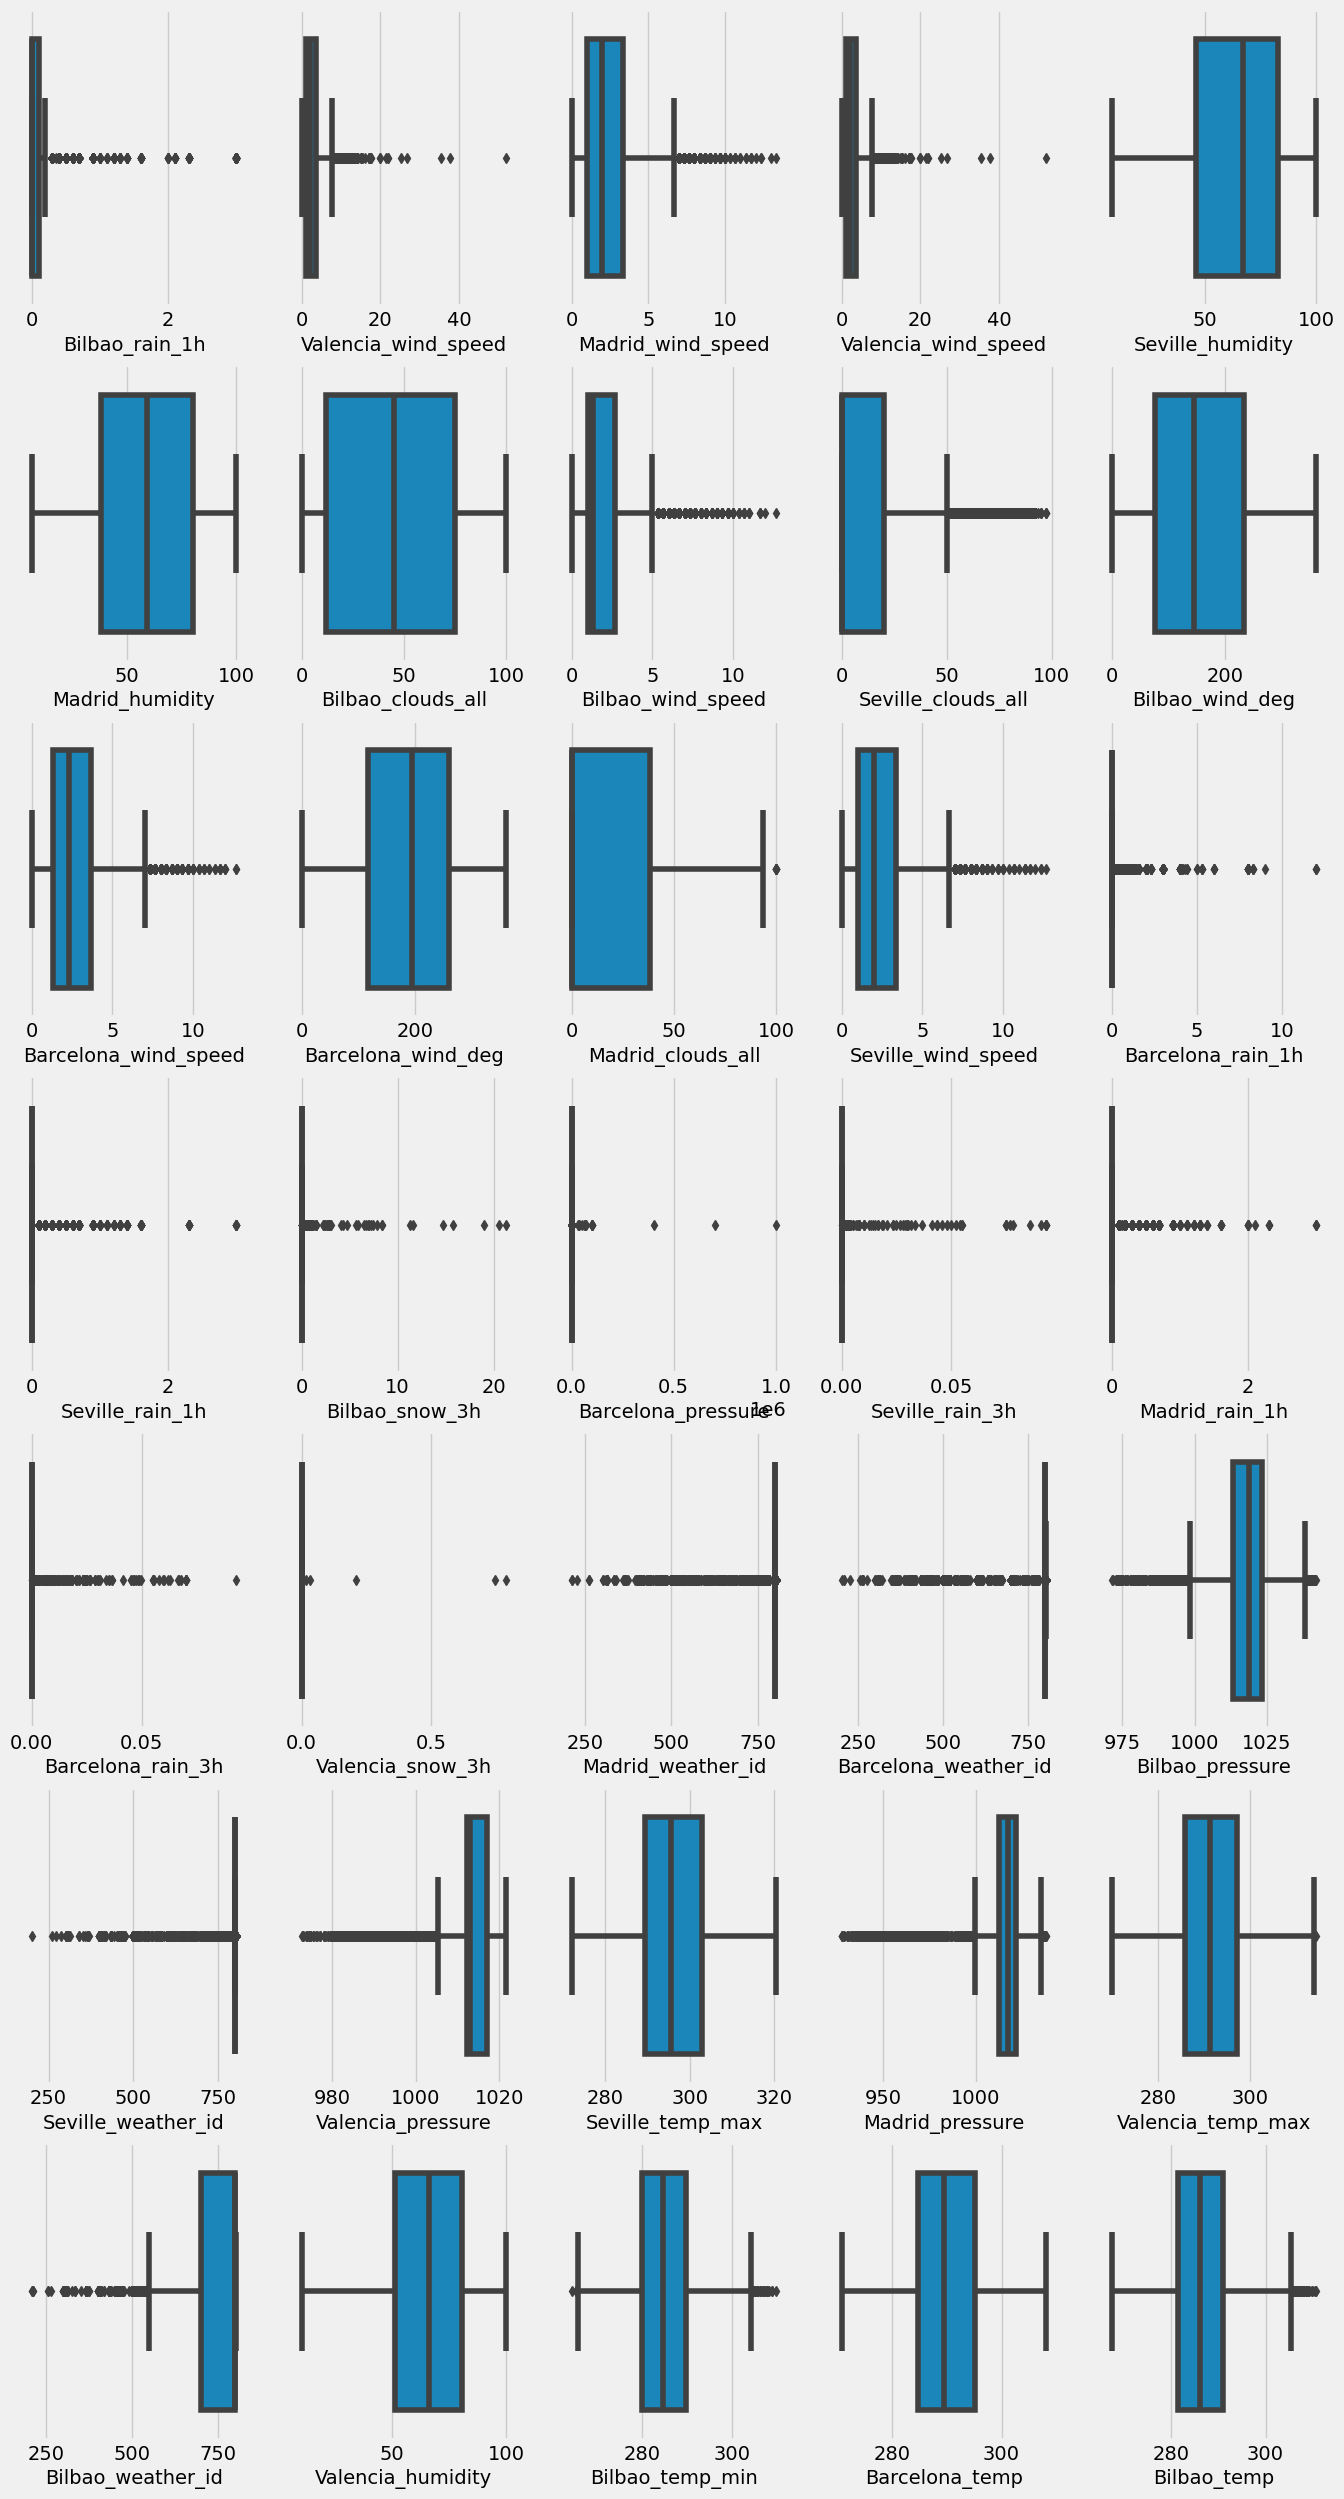

In [13]:
fig, axes = plt.subplots(7, 5, figsize=(15, 30))
  
sns.boxplot(ax=axes[0, 0], data=df_new, x='Bilbao_rain_1h')
sns.boxplot(ax=axes[0, 1], data=df_new, x='Valencia_wind_speed')
sns.boxplot(ax=axes[0, 2], data=df_new, x='Madrid_wind_speed')
sns.boxplot(ax=axes[0, 3], data=df_new, x='Valencia_wind_speed')
sns.boxplot(ax=axes[0, 4], data=df_new, x='Seville_humidity')
sns.boxplot(ax=axes[1, 0], data=df_new, x='Madrid_humidity')
sns.boxplot(ax=axes[1, 1], data=df_new, x='Bilbao_clouds_all')
sns.boxplot(ax=axes[1, 2], data=df_new, x='Bilbao_wind_speed')
sns.boxplot(ax=axes[1, 3], data=df_new, x='Seville_clouds_all')
sns.boxplot(ax=axes[1, 4], data=df_new, x='Bilbao_wind_deg')
sns.boxplot(ax=axes[2, 0], data=df_new, x='Barcelona_wind_speed')
sns.boxplot(ax=axes[2, 1], data=df_new, x='Barcelona_wind_deg')
sns.boxplot(ax=axes[2, 2], data=df_new, x='Madrid_clouds_all')
sns.boxplot(ax=axes[2, 3], data=df_new, x='Seville_wind_speed')
sns.boxplot(ax=axes[2, 4], data=df_new, x='Barcelona_rain_1h')
sns.boxplot(ax=axes[3, 0], data=df_new, x='Seville_rain_1h')
sns.boxplot(ax=axes[3, 1], data=df_new, x='Bilbao_snow_3h')
sns.boxplot(ax=axes[3, 2], data=df_new, x='Barcelona_pressure')
sns.boxplot(ax=axes[3, 3], data=df_new, x='Seville_rain_3h')
sns.boxplot(ax=axes[3, 4], data=df_new, x='Madrid_rain_1h')
sns.boxplot(ax=axes[4, 0], data=df_new, x='Barcelona_rain_3h')
sns.boxplot(ax=axes[4, 1], data=df_new, x='Valencia_snow_3h')
sns.boxplot(ax=axes[4, 2], data=df_new, x='Madrid_weather_id')
sns.boxplot(ax=axes[4, 3], data=df_new, x='Barcelona_weather_id')
sns.boxplot(ax=axes[4, 4], data=df_new, x='Bilbao_pressure')
sns.boxplot(ax=axes[5, 0], data=df_new, x='Seville_weather_id')
sns.boxplot(ax=axes[5, 1], data=df_new, x='Valencia_pressure')
sns.boxplot(ax=axes[5, 2], data=df_new, x='Seville_temp_max')
sns.boxplot(ax=axes[5, 3], data=df_new, x='Madrid_pressure')
sns.boxplot(ax=axes[5, 4], data=df_new, x='Valencia_temp_max')
sns.boxplot(ax=axes[6, 0], data=df_new, x='Bilbao_weather_id')
sns.boxplot(ax=axes[6, 1], data=df_new, x='Valencia_humidity')
sns.boxplot(ax=axes[6, 2], data=df_new, x='Bilbao_temp_min')
sns.boxplot(ax=axes[6, 3], data=df_new, x='Barcelona_temp')
sns.boxplot(ax=axes[6, 4], data=df_new, x='Bilbao_temp')

## Checking Categorical Variables

In [14]:
#separate categorical data from numeric
categorical_df = df_new.select_dtypes(exclude=[np.number])
categorical_df.head(3)

time Valencia_wind_deg Seville_pressure
0  2015-01-01 03:00:00           level_5             sp25
1  2015-01-01 06:00:00          level_10             sp25
2  2015-01-01 09:00:00           level_9             sp25

Only two columns got catergorical data, so we are tasked to deal with those catergorical variable, extract numeric from them.

In [15]:
#change the data type of time to datetime
df_new['time']=pd.to_datetime(df_new['time'])

In [16]:
#seperating time into day,month,year,week and hour
df_new["day"] = df_new["time"].dt.day
df_new["month"] = df_new["time"].dt.month
df_new["year"] = df_new["time"].dt.year
df_new["weekday"] = df_new["time"].dt.weekday
df_new["hour"] = df_new["time"].dt.hour

C:\Users\Lebohang\AppData\Local\Temp\ipykernel_21168\3900972506.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


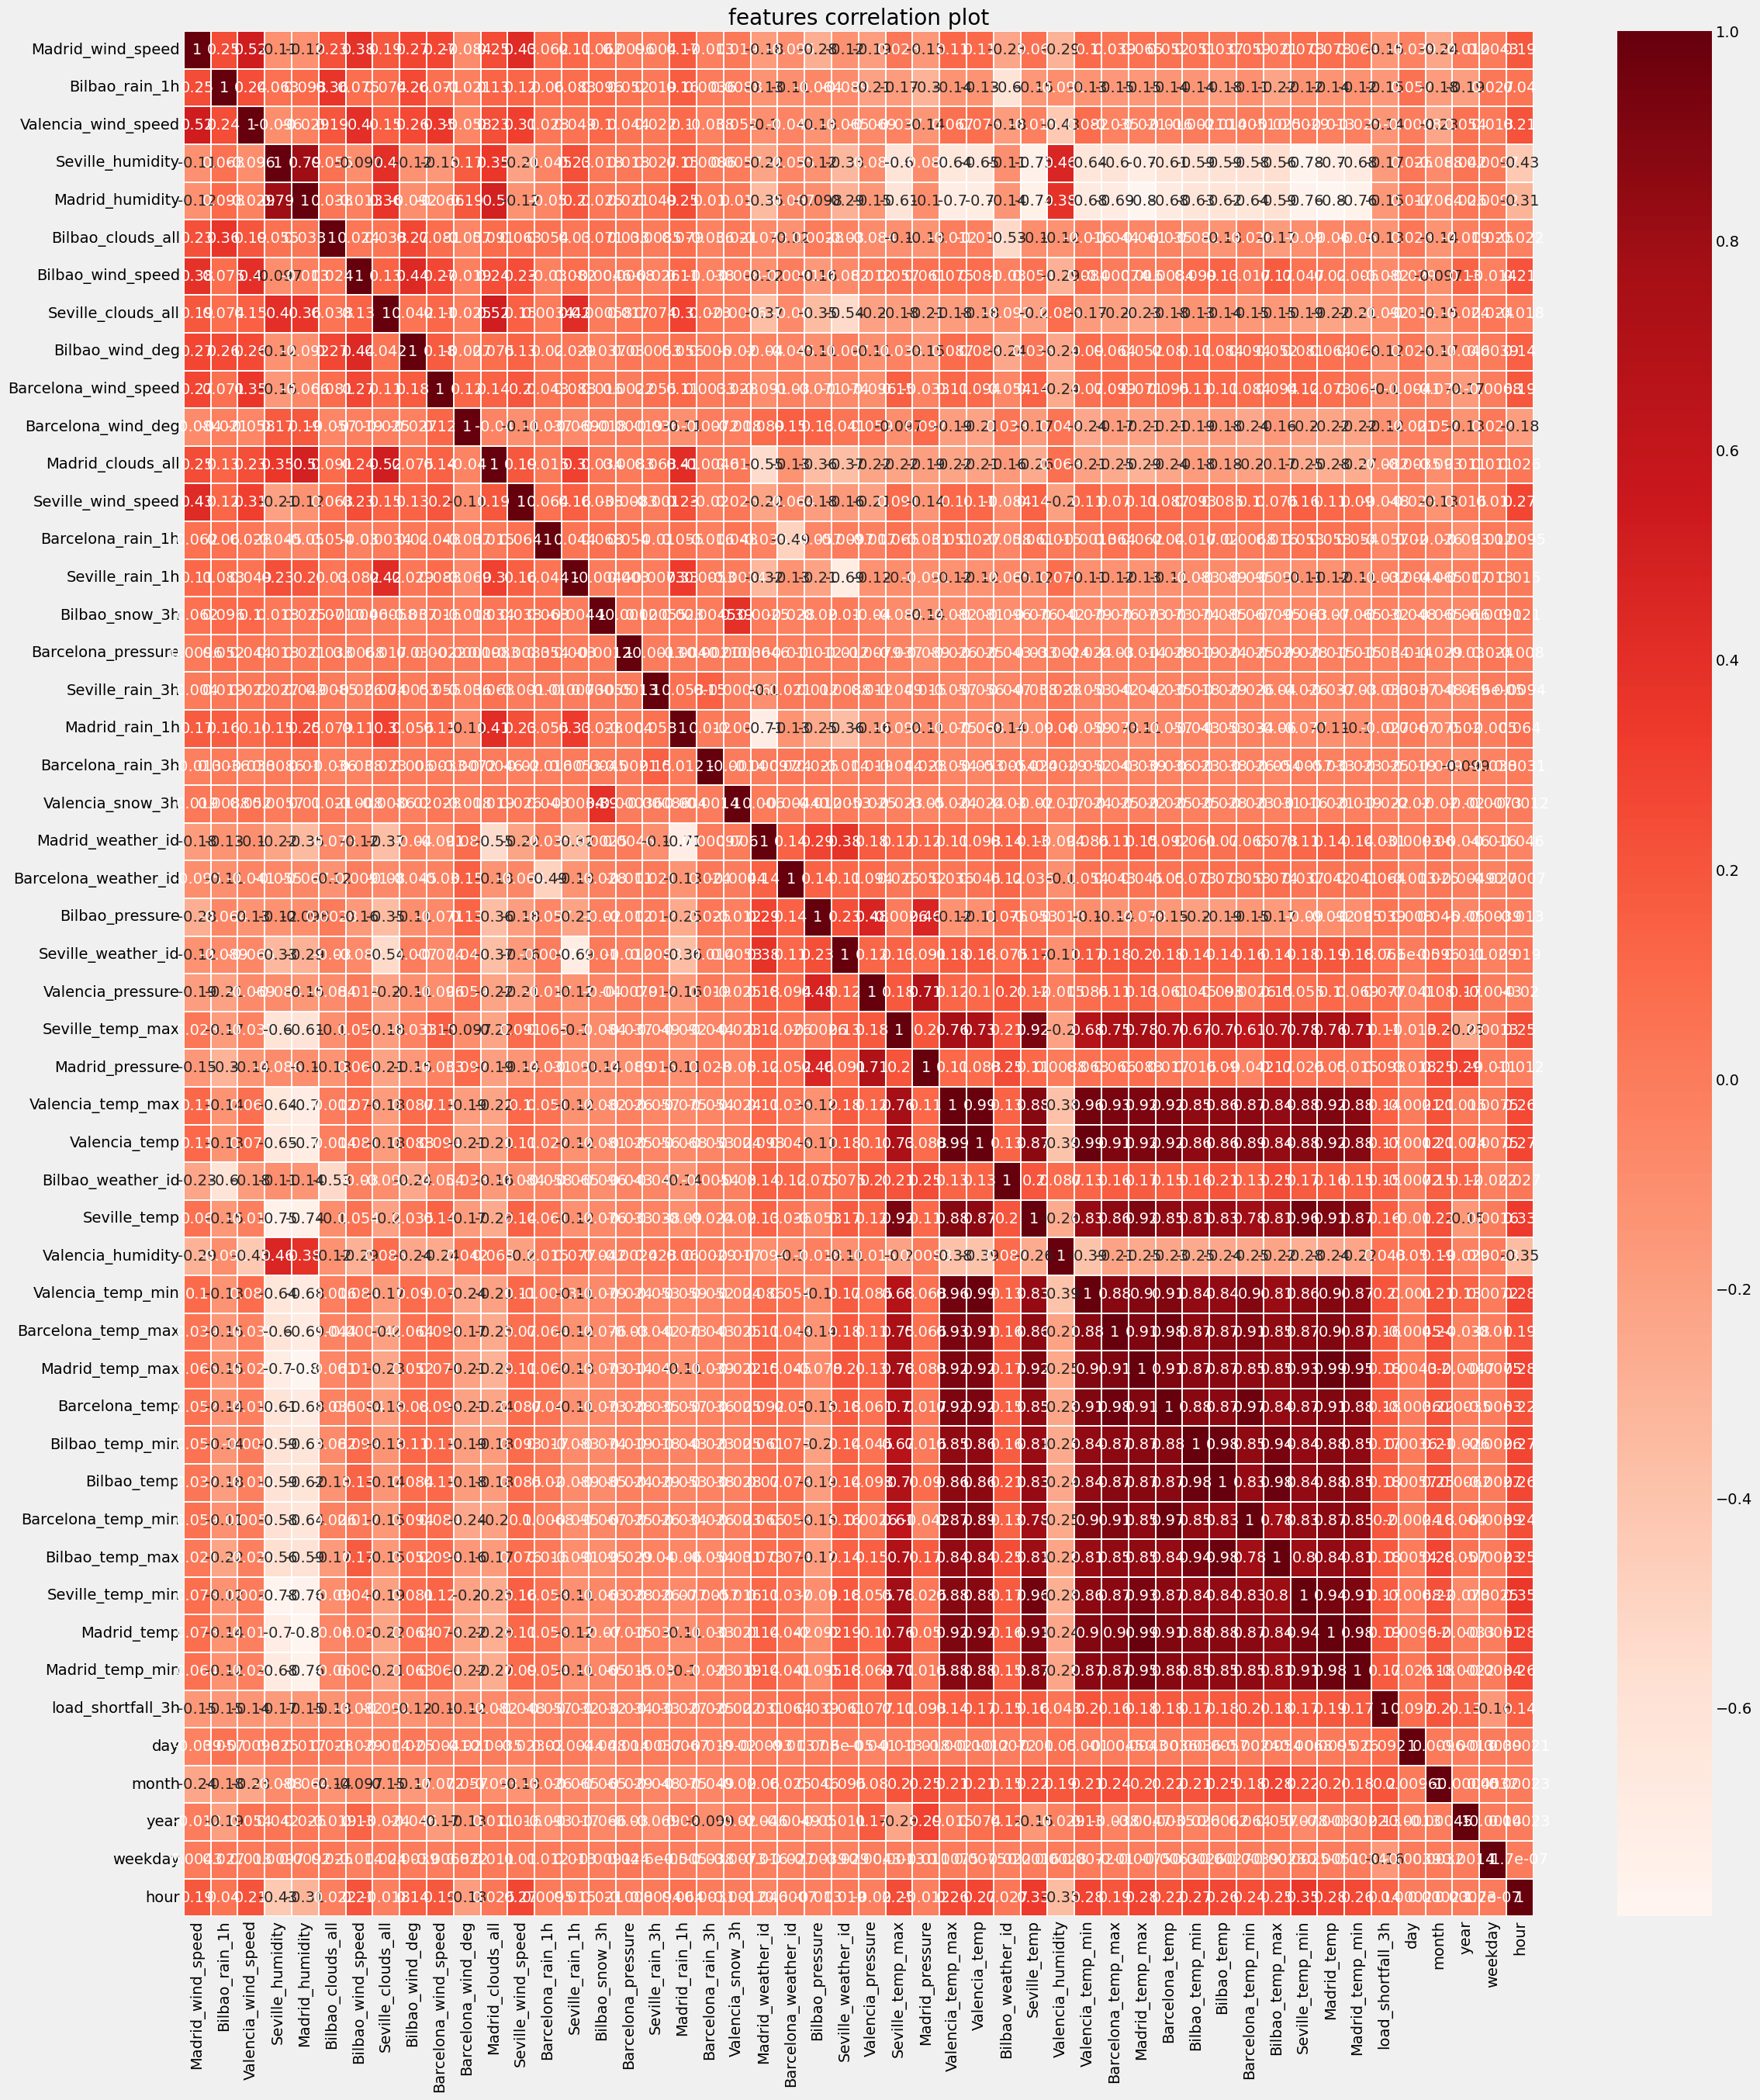

In [17]:
# evaluate correlation
plt.figure(figsize = (25,30))
plt.title('features correlation plot')
corr = df_new.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="Reds")
plt.show()

 <a id="five"></a>
## 4. Data Engineering

Data enginineering is the practice designing and building system for collecting, storing and analyzing data at scale.

In [18]:
# Extracting numeric values from the affected columns

df_new['Valencia_wind_deg'] = df_new['Valencia_wind_deg'].str.extract('(\d+)')
df_new['Seville_pressure'] = df_new['Seville_pressure'].str.extract('(\d+)')
df_new[['Valencia_wind_deg','Seville_pressure']] = df_new[['Valencia_wind_deg','Seville_pressure']].apply(pd.to_numeric)

In [19]:
## Creating correlation matrix function to drop the highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [20]:
corr_features = correlation(df_new, 0.8)
len(set(corr_features))

C:\Users\Lebohang\AppData\Local\Temp\ipykernel_21168\3007989099.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()


13

In [21]:
corr_features

{'Barcelona_temp',
 'Barcelona_temp_max',
 'Barcelona_temp_min',
 'Bilbao_temp',
 'Bilbao_temp_max',
 'Bilbao_temp_min',
 'Madrid_temp',
 'Madrid_temp_max',
 'Madrid_temp_min',
 'Seville_temp',
 'Seville_temp_min',
 'Valencia_temp',
 'Valencia_temp_min'}

In [22]:
df_new= df_new.drop(corr_features,axis=1)

C:\Users\Lebohang\AppData\Local\Temp\ipykernel_21168\4091701163.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_new.corr()


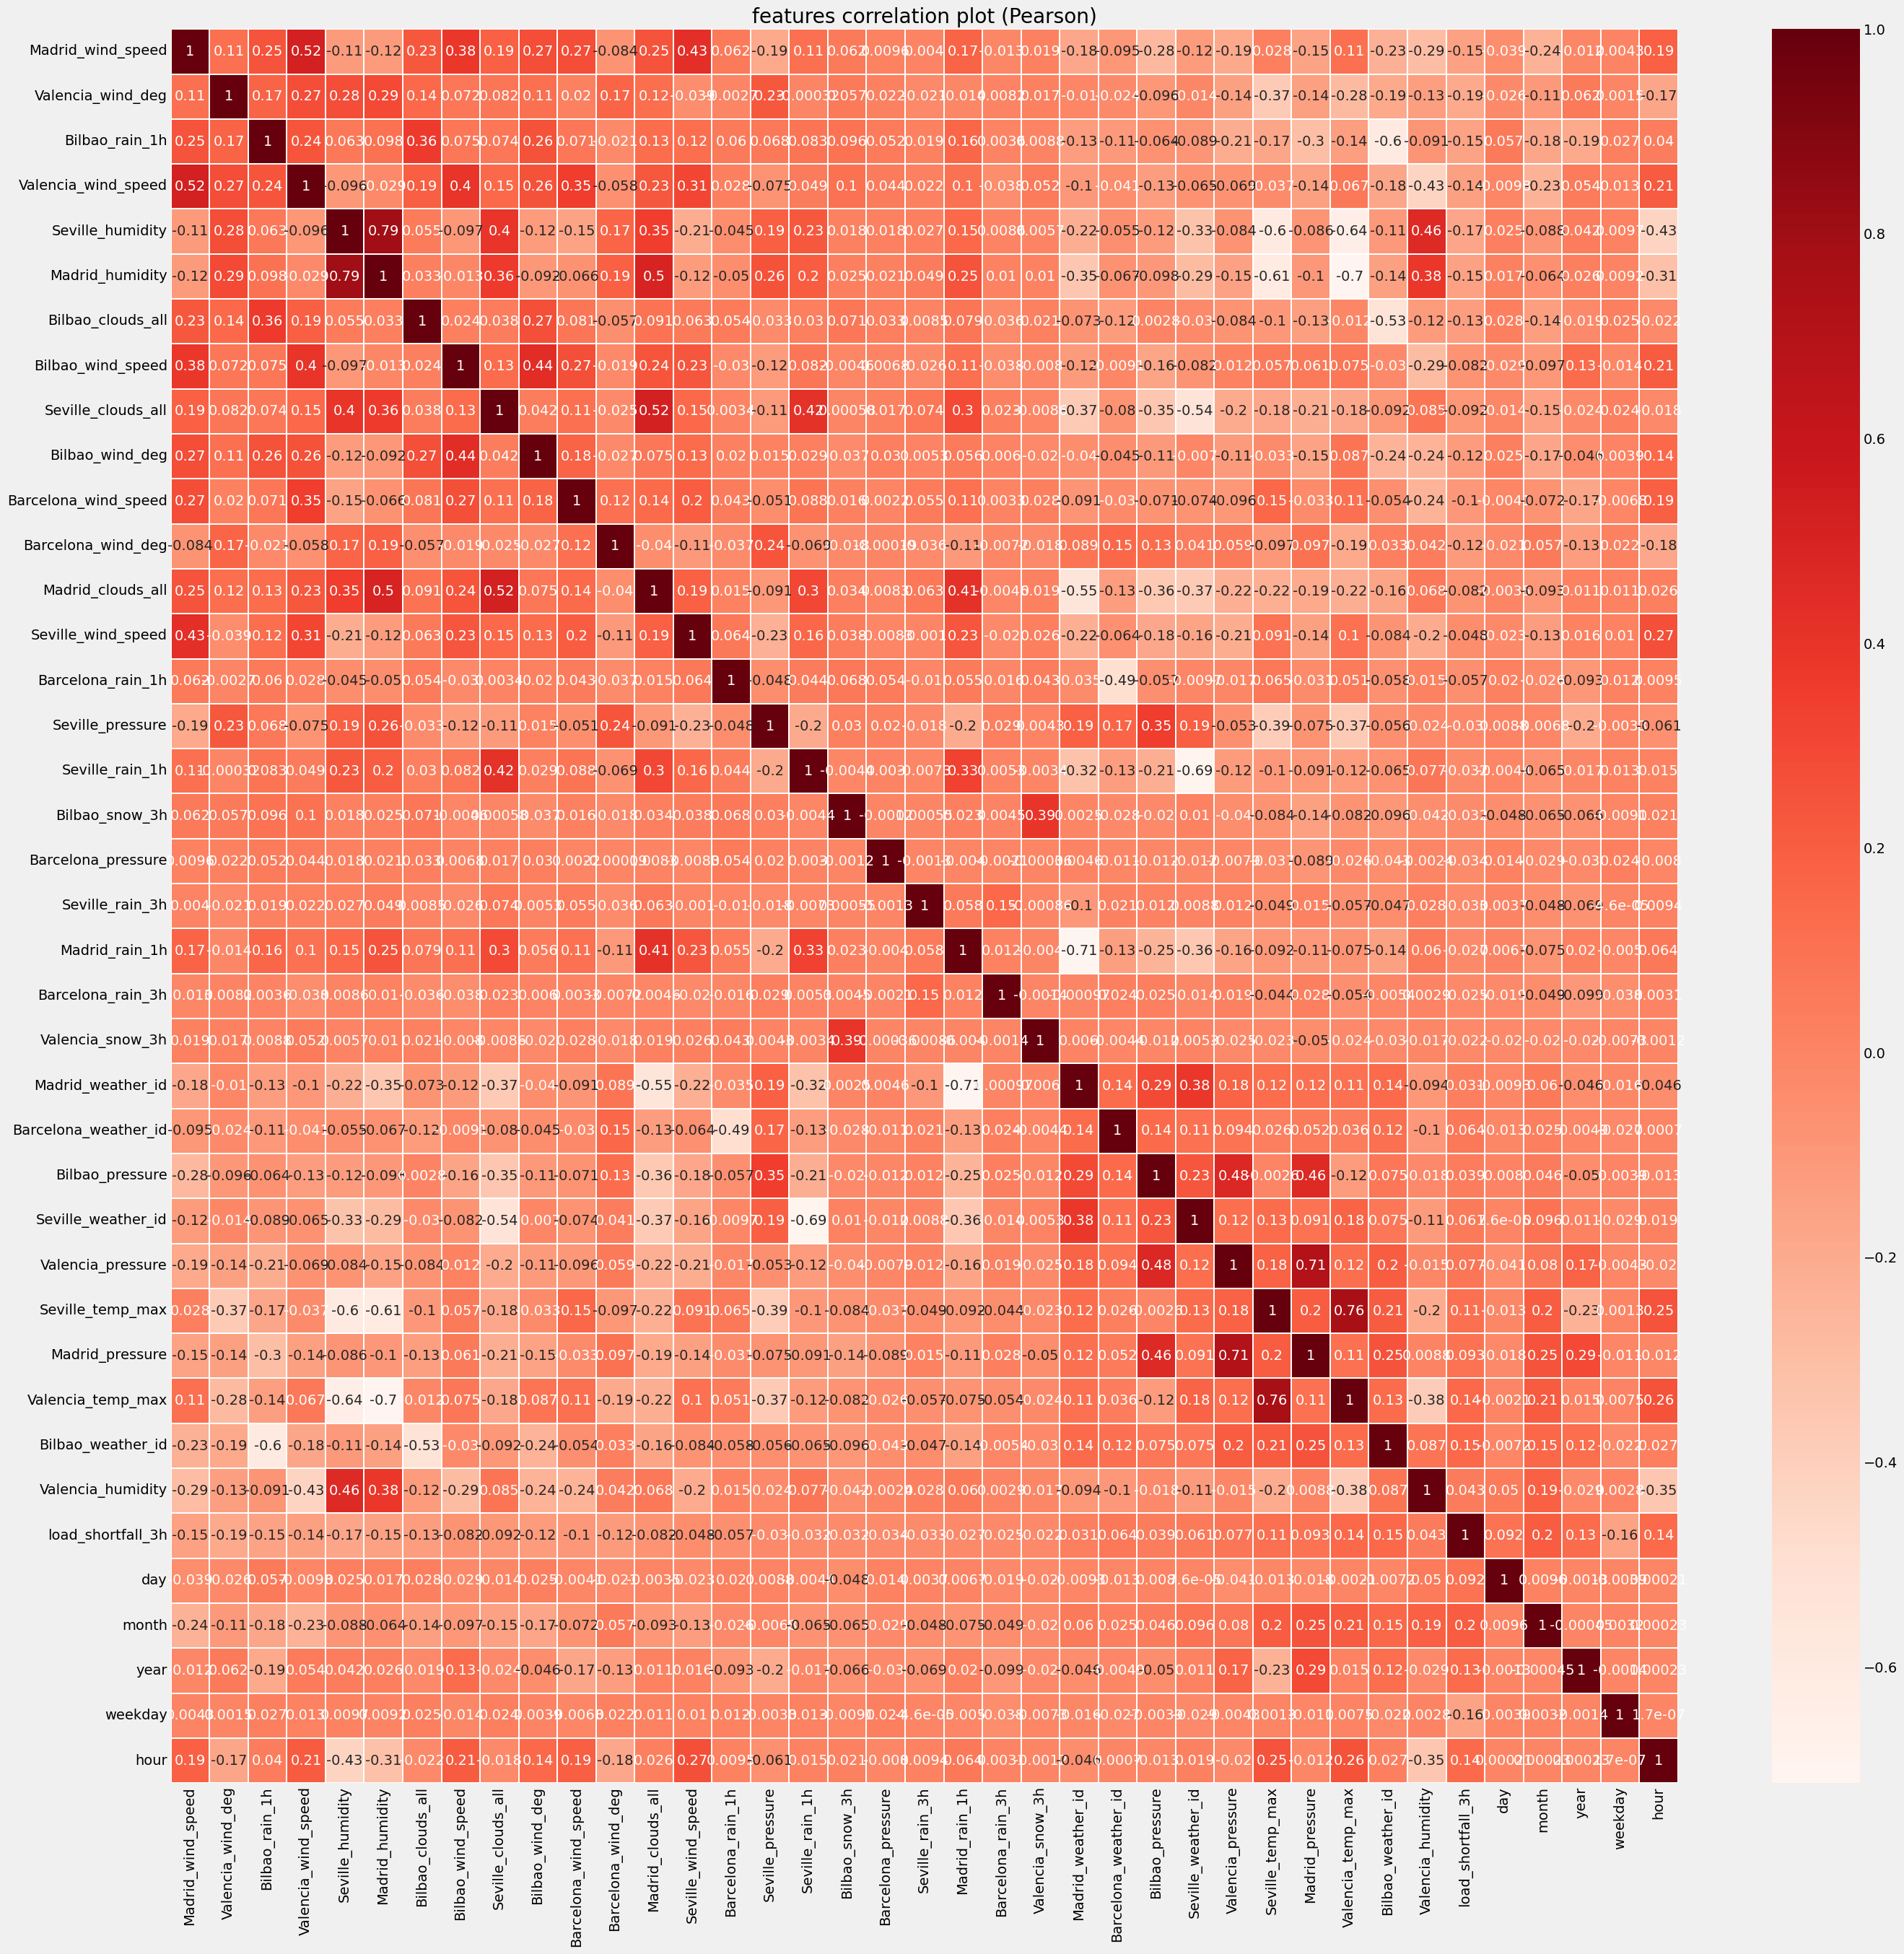

In [23]:
# evaluate correlation
plt.figure(figsize = (30,30))
plt.title('features correlation plot (Pearson)')
corr = df_new.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot = True,linewidths=.1,cmap="Reds")
plt.show()

In [24]:
# Reorder columns so that our response variable is the last column of the dataframe
column_titles = [col for col in df_new.columns if col!= 'load_shortfall_3h'] + ['load_shortfall_3h']
df_new = df_new.reindex(columns=column_titles)

In [25]:
#drop the time variable
df_new=df_new.drop(['time'],axis=1)

 <a id="six"></a>
## 5. Modelling

In [26]:
# split data
y = df_new[:len(df_train)][['load_shortfall_3h']]
X = df_new[:len(df_train)].drop('load_shortfall_3h',axis=1)
# Ignore for now
x_train = df_new[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_new[len(df_train):].drop('load_shortfall_3h',axis=1)

In [27]:
#standardising the data
scaler = StandardScaler()
X_transformed=scaler.fit_transform(X)

In [28]:
# Split the data into training and testing test 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2) 

## Defining Models

In [29]:
# Linear Regression
L_reg = LinearRegression()
L_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
D_Tree = DecisionTreeRegressor(max_depth=6,random_state=0)
D_Tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=6, random_state=0)

In [31]:
# Create ridge model
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [32]:
# Create LASSO model object, setting alpha to 0.01
lasso = Lasso(alpha=0.01)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [33]:
R_F = RandomForestRegressor(n_estimators=500, random_state=0)
R_F.fit(X_train,y_train)

C:\Users\Lebohang\AppData\Local\Temp\ipykernel_21168\3885803708.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R_F.fit(X_train,y_train)


RandomForestRegressor(n_estimators=500, random_state=0)

 <a id="seven"></a>
## 6. Models Perfomance

We will evaluate our models using Root Mean Square Error (RMSE) and Coefficient of Determination (R^2)

In [34]:
#Compare models

# Make training set predictions for each model
y_pred_lin_train = L_reg.predict(X_train)
y_pred_DT_train = D_Tree.predict(X_train)
y_pred_RF_train = R_F.predict(X_train)
y_pred_RG_train = ridge.predict(X_train)
y_pred_LSS_train = lasso.predict(X_train)
# Make test set predictions for each model
y_pred_lin_test = L_reg.predict(X_test)
y_pred_DT_test = D_Tree.predict(X_test)
y_pred_RF_test = R_F.predict(X_test)
y_pred_RG_test = ridge.predict(X_test)
y_pred_LSS_test = lasso.predict(X_test)
# Dictionary of results
metrics_dict = {'Training RMSE':{
                        "Linear Regression":metrics.mean_squared_error(y_train, y_pred_lin_train,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_train, y_pred_DT_train,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_train, y_pred_RF_train,squared=False),
                        "Ridge Regression": metrics.mean_squared_error(y_train, y_pred_RG_train,squared=False),
                        "Lasso Regression": metrics.mean_squared_error(y_train, y_pred_LSS_train,squared=False)
                },
                'Test RMSE':{
                        "Linear Regression": metrics.mean_squared_error(y_test, y_pred_lin_test,squared=False),
                        "Decision Tree": metrics.mean_squared_error(y_test,  y_pred_DT_test,squared=False),
                        "Random Forest": metrics.mean_squared_error(y_test, y_pred_RF_test,squared=False),
                        "Ridge Regression": metrics.mean_squared_error(y_test, y_pred_RG_test,squared=False),
                        "Lasso Regression": metrics.mean_squared_error(y_test, y_pred_LSS_test,squared=False)
                },
                'Train R^2':{
                        "Linear Regression":metrics.r2_score(y_train, y_pred_lin_train),
                        "Decision Tree":metrics.r2_score(y_train, y_pred_DT_train),
                        "Random Forest":metrics.r2_score(y_train,y_pred_RF_train),
                        "Ridge Regression":metrics.r2_score(y_train,y_pred_RG_train),
                        "Lasso Regression":metrics.r2_score(y_train,y_pred_LSS_train)
                    
                },
                'Test R^2':{
                        "Linear Regression":metrics.r2_score(y_test, y_pred_lin_test),
                        "Decision Tree":metrics.r2_score(y_test,y_pred_DT_test),
                        "Random Forest":metrics.r2_score(y_test,y_pred_RF_test),
                        "Ridge Regression":metrics.r2_score(y_test,y_pred_RG_test),
                        "Lasso Regression":metrics.r2_score(y_test,y_pred_LSS_test)
                                                                                }
                }
output=pd.DataFrame(metrics_dict)

output

Training RMSE    Test RMSE  Train R^2  Test R^2
Linear Regression    4722.071078  4830.685235   0.176706  0.160042
Decision Tree        3630.267089  3923.971269   0.513406  0.445768
Random Forest         998.255503  2823.599165   0.963206  0.713024
Ridge Regression     4723.247058  4833.709227   0.176296  0.158990
Lasso Regression     4722.072553  4830.747708   0.176706  0.160020

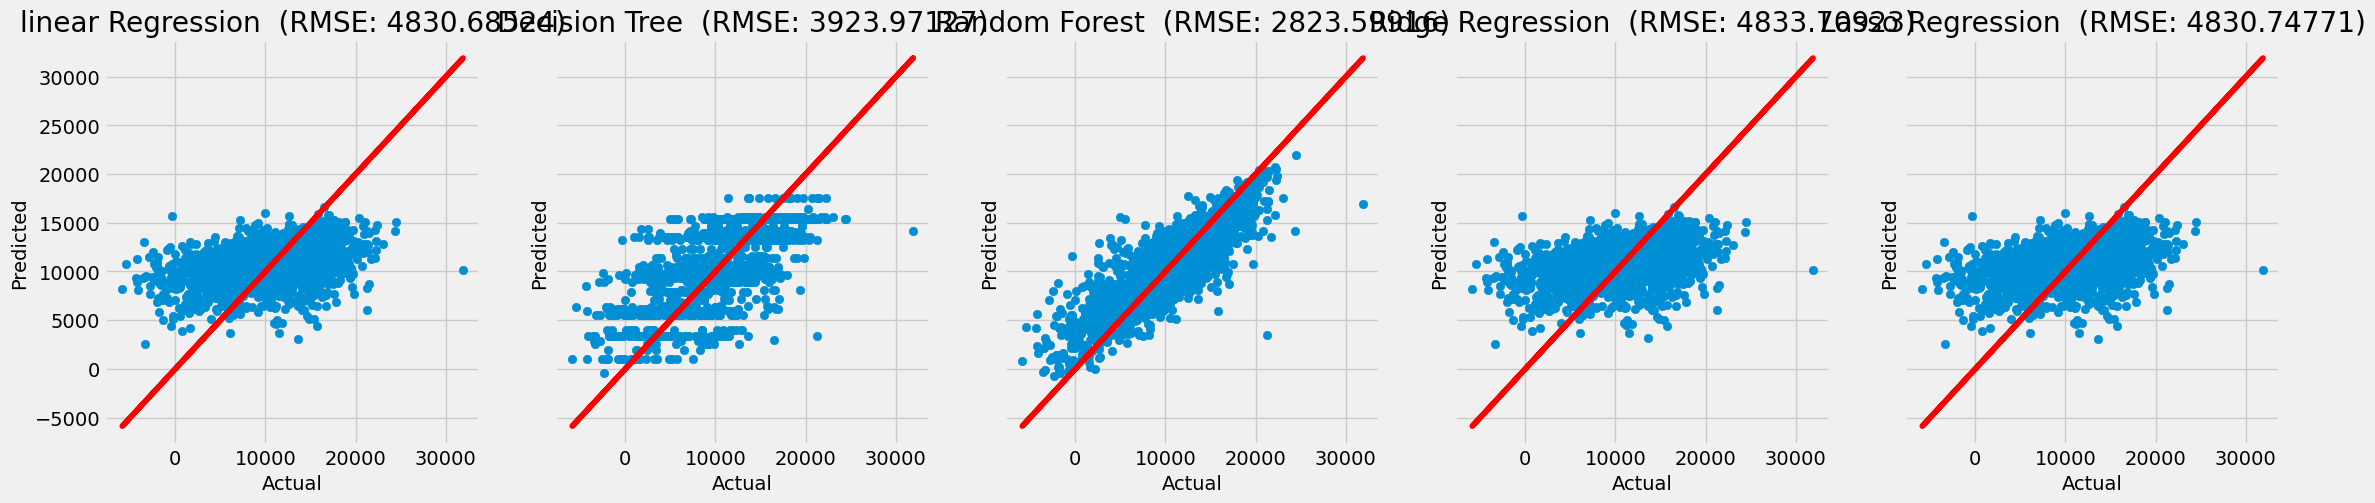

In [35]:
# Create figure and axes
f, ax = plt.subplots(figsize=(25,5), nrows=1, ncols=5,sharey=True)

# Create list of titles and predictions to use in for loop
pred = [L_reg.predict(X_test), D_Tree.predict(X_test), R_F.predict(X_test),ridge.predict(X_test),lasso.predict(X_test)]
title = ['linear Regression', 'Decision Tree', 'Random Forest',"Ridge Regression","Lasso Regression"]

# Loop through all axes to plot each models' results 
for i in range(5):
    rmse = round(np.sqrt(metrics.mean_squared_error(pred[i],y_test)),5)
    ax[i].set_title(title[i]+"  (RMSE: "+str(rmse)+ ")")
    ax[i].set_xlabel('Actual')
    ax[i].set_ylabel('Predicted')
    ax[i].plot(y_test,y_test,'r')
    ax[i].scatter(y_test,pred[i])

From the above plot results it is pretty clear that random forest perform better than the other two models we created.

## Submission

In [36]:
#Make submission
x_train = df_new[:len(df_train)].drop('load_shortfall_3h',axis=1)
x_test = df_new[len(df_train):].drop('load_shortfall_3h',axis=1)

In [37]:
R_F.fit(x_train, y)
y_test_RF = R_F.predict(x_test)

C:\Users\Lebohang\AppData\Local\Temp\ipykernel_21168\242695139.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R_F.fit(x_train, y)


In [38]:
df_forecast=pd.DataFrame(y_test_RF,columns=['load_shortfall_3h'])
df_forecast.head()

load_shortfall_3h
0       10249.854667
1        7906.052000
2        7252.042667
3       10122.693333
4       11944.805000

In [40]:
forecast=pd.DataFrame({'time':df_test['time']})
submission=forecast.join(df_forecast)
submission.to_csv('submission.csv',index=False)